# Supervised Regression with Multiple Variables
<hr>

## 0. Import library
<ht>

In [2]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

## 1. Load dataset
<hr>

Load a set of data points $\{ (x_i, y_i, z_i) \}_{i=1}^n$ where $x_i$ and $y_i$ are considered as an input and $z_i$ is considered as an output for $i$-th data point.

In [4]:
# import data with numpy
data_clean = np.genfromtxt('data_clean.txt', delimiter=',')
data_noisy = np.genfromtxt('data_noisy.txt', delimiter=',')

data_clean = data_clean[:,0:3]  # do not change it
data_noisy = data_noisy[:,0:3]  # do not change it

# number of training data
n_clean = data_clean.shape[0]
n_noisy = data_noisy.shape[0]

print("Number of clean data = {}".format(n_clean))
print("Number of noisy data = {}".format(n_noisy))
print("Size of clean data = {}".format(data_clean.shape))
print("Type of clean data = {}".format(data_clean.dtype))
print("Size of noisy data = {}".format(data_noisy.shape))
print("Type of noisy data = {}".format(data_noisy.dtype))

Number of clean data = 3600
Number of noisy data = 3600
Size of clean data = (3600, 3)
Type of clean data = float64
Size of noisy data = (3600, 3)
Type of noisy data = float64


## 2. Explore the dataset distribution
<hr>

Plot the training data points in 3D cartesian coordinate system.
(You may use matplotlib function `scatter3D()`.)

In [5]:
x_clean = data_clean[:,0]
y_clean = data_clean[:,1]
z_clean = data_clean[:,2]

x_train = data_noisy[:,0]
y_train = data_noisy[:,1]
z_train = data_noisy[:,2]

# clean data
XYR = np.linspace(-1, 1, 8)

xx, yy = np.meshgrid(XYR, XYR, indexing='xy')

cleanDataFig = plt.figure(figsize = (12, 10))
cleanDataAx = cleanDataFig.add_subplot(projection = '3d')
cleanDataAx.set_title(label = 'clean data')
cleanDataAx.scatter(x_clean, y_clean, z_clean, c = 'b')


# noisy data
trainDataFig = plt.figure(figsize = (12, 10))
trainDataAx = trainDataFig.add_subplot(projection = '3d')
trainDataAx.set_title(label = 'noisy data')
trainDataAx.scatter(x_train, y_train, z_train, c = 'r')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

## 3. Define the prediction function 
<hr>
$$
f_w(x, y) = w_0 f_0(x, y) + w_1 f_1(x, y) + w_2 f_2(x, y) + w_3 f_3(x, y) + w_4 f_4(x, y) + w_5 f_5(x, y) + w_6 f_6(x, y) + w_7 f_7(x, y) + w_8 f_8(x, y) + w_9 f_9(x, y)
$$

where feature function $f$ is defined as follows:

$$
\begin{align*}
    f_0(x, y) &= \\
    f_1(x, y) &= \\
    f_2(x, y) &= \\
    f_3(x, y) &= \\
    f_4(x, y) &= \\
    f_5(x, y) &= \\
    f_6(x, y) &= \\
    f_7(x, y) &= \\
    f_8(x, y) &= \\
    f_9(x, y) &= 
\end{align*}
$$

### Vectorized implementation:

$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
f_0(x_1, y_1) & f_1(x_1, y_1) & f_2(x_1, y_1) & f_3(x_1, y_1) & f_4(x_1, y_1) & f_5(x_1, y_1) & f_6(x_1, y_1) & f_7(x_1, y_1) & f_8(x_1, y_1) & f_9(x_1, y_1) \\
f_0(x_2, y_2) & f_1(x_2, y_2) & f_2(x_2, y_2) & f_3(x_2, y_2) & f_4(x_2, y_2) & f_5(x_2, y_2) & f_6(x_2, y_2) & f_7(x_2, y_2) & f_8(x_2, y_2) & f_9(x_2, y_2) \\
\vdots\\
f_0(x_n, y_n) & f_1(x_n, y_n) & f_2(x_n, y_n) & f_3(x_n, y_n) & f_4(x_n, y_n) & f_5(x_n, y_n) & f_6(x_n, y_n) & f_7(x_n, y_n) & f_8(x_n, y_n) & f_9(x_n, y_n)
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\
w_7 \\
w_8 \\
w_9
\end{array} 
\right]
$$

Implement the vectorized version of the predictive function. <br>

In [6]:
# construct data matrix

n = data_noisy.shape[0]
X = np.ones([n,10]) 

X[:,1] = 1
X[:,2] = x_train
X[:,3] = y_train
X[:,4] = x_train * y_train
X[:,5] = (x_train) ** 2
X[:,6] = (y_train) ** 2
X[:,7] = ((x_train) ** 2) * (y_train ** 2)
X[:,8] = (x_train) ** 3
X[:,9] = (y_train) ** 3

print(X.shape)

# parameters vector
w = np.array([1,1,1,1,1,1,1,1,1,1])[:,None] # [:,None] adds a singleton dimension

# predictive function definition
def f_pred(X,w): 
    
    f = np.dot(X, w)
    
    return f 

# Test predicitive function 
z_pred = f_pred(X,w)

(3600, 10)


## 4. Define the regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i, y_i) – z_i \Big)^2
$$

### Vectorized implementation:

$$
L(w)=\frac{1}{n} (Xw-z)^T(Xw-z)
$$
with 
<br>
$$
Xw=
\left[ 
\begin{array}{cccc}
f_w(x_1, y_1) \\ 
f_w(x_2, y_2) \\ 
\vdots\\
f_w(x_n, y_n) \\ 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
z = 
\left[ 
\begin{array}{cccc}
z_1 \\ 
z_2 \\ 
\vdots\\
z_n
\end{array} 
\right]
$$

Implement the vectorized version of the regression loss function. <br>


In [7]:
# loss function definition
def loss_mse(z_pred,z): 
    
    temp = z_pred - z
    loss = np.dot(temp.T, temp) / z_pred.size
    
    return loss


# Test loss function 
z = np.array(z_train).reshape(-1, 1) # label
z_pred = f_pred(X,w) # prediction

loss = loss_mse(z_pred,z)

## 5. Define the gradient of the regression loss 
<hr>

$\bullet$ Vectorized implementation: Given the loss

$$
L(w)=\frac{1}{n} (Xw-z)^T(Xw-z)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-z)
$$


Implement the vectorized version of the gradient of the regression loss function.

In [8]:
# gradient function definition
def grad_loss(z_pred,z,X):

    grad = (np.dot(X.T, z_pred - z) * 2) / z_pred.size
    
    return grad


# Test grad function 
z_pred = f_pred(X,w)
grad = grad_loss(z_pred,z,X)

## 6. Implement the gradient descent algorithm 
<hr>

### Vectorized implementation: 

$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-z)
$$

Implement the vectorized version of the gradient descent function.

Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

Time= 0.22683024406433105
0.08904299622332396
[[ 0.00940452]
 [ 0.00940452]
 [-0.02915459]
 [-0.04968469]
 [-0.00914727]
 [ 0.90208055]
 [-1.04096736]
 [ 0.21386662]
 [ 0.16927447]
 [ 0.18288764]]


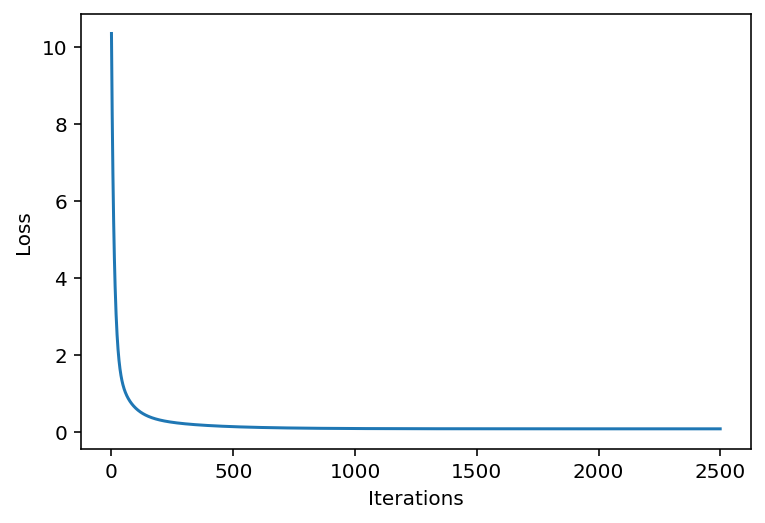

In [9]:
# gradient descent function definition
def grad_desc(X, z , w_init=np.array([1,1,1,1,1,1,1,1,1,1])[:,None] ,tau=0.01, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter, w_init.size]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        z_pred = f_pred(X,w) # linear predicition function 
        grad_f = grad_loss(z_pred,z,X) # gradient of the loss 
        w = w - tau * grad_f # update rule of gradient descent
        L_iters[i] = loss_mse(z_pred, z) # save the current loss value 
        w_iters[i,:] = w.T # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = np.array([1,1,1,1,1,1,1,1,1,1])[:,None]
tau = 0.01
max_iter = 2500
z = np.array(z_train).reshape(-1, 1)

w, L_iters, w_iters = grad_desc(X, z, w_init, tau,max_iter)

print('Time=',time.time() - start) # plot the computational cost
print(L_iters[max_iter-1]) # plot the last value of the loss
print(w) # plot the last value of the parameter w 


# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 7. Plot the prediction function
<hr>
$$
f_w(x, y) = w_0 f_0(x, y) + w_1 f_1(x, y) + w_2 f_2(x, y) + w_3 f_3(x, y) + w_4 f_4(x, y) + w_5 f_5(x, y) + w_6 f_6(x, y) + w_7 f_7(x, y) + w_8 f_8(x, y) + w_9 f_9(x, y)
$$

(You may use numpy function `meshgrid` and `plot_surface` for plot the linear prediction function.)

(-1.1553798538250017, 1.0618397033509592)

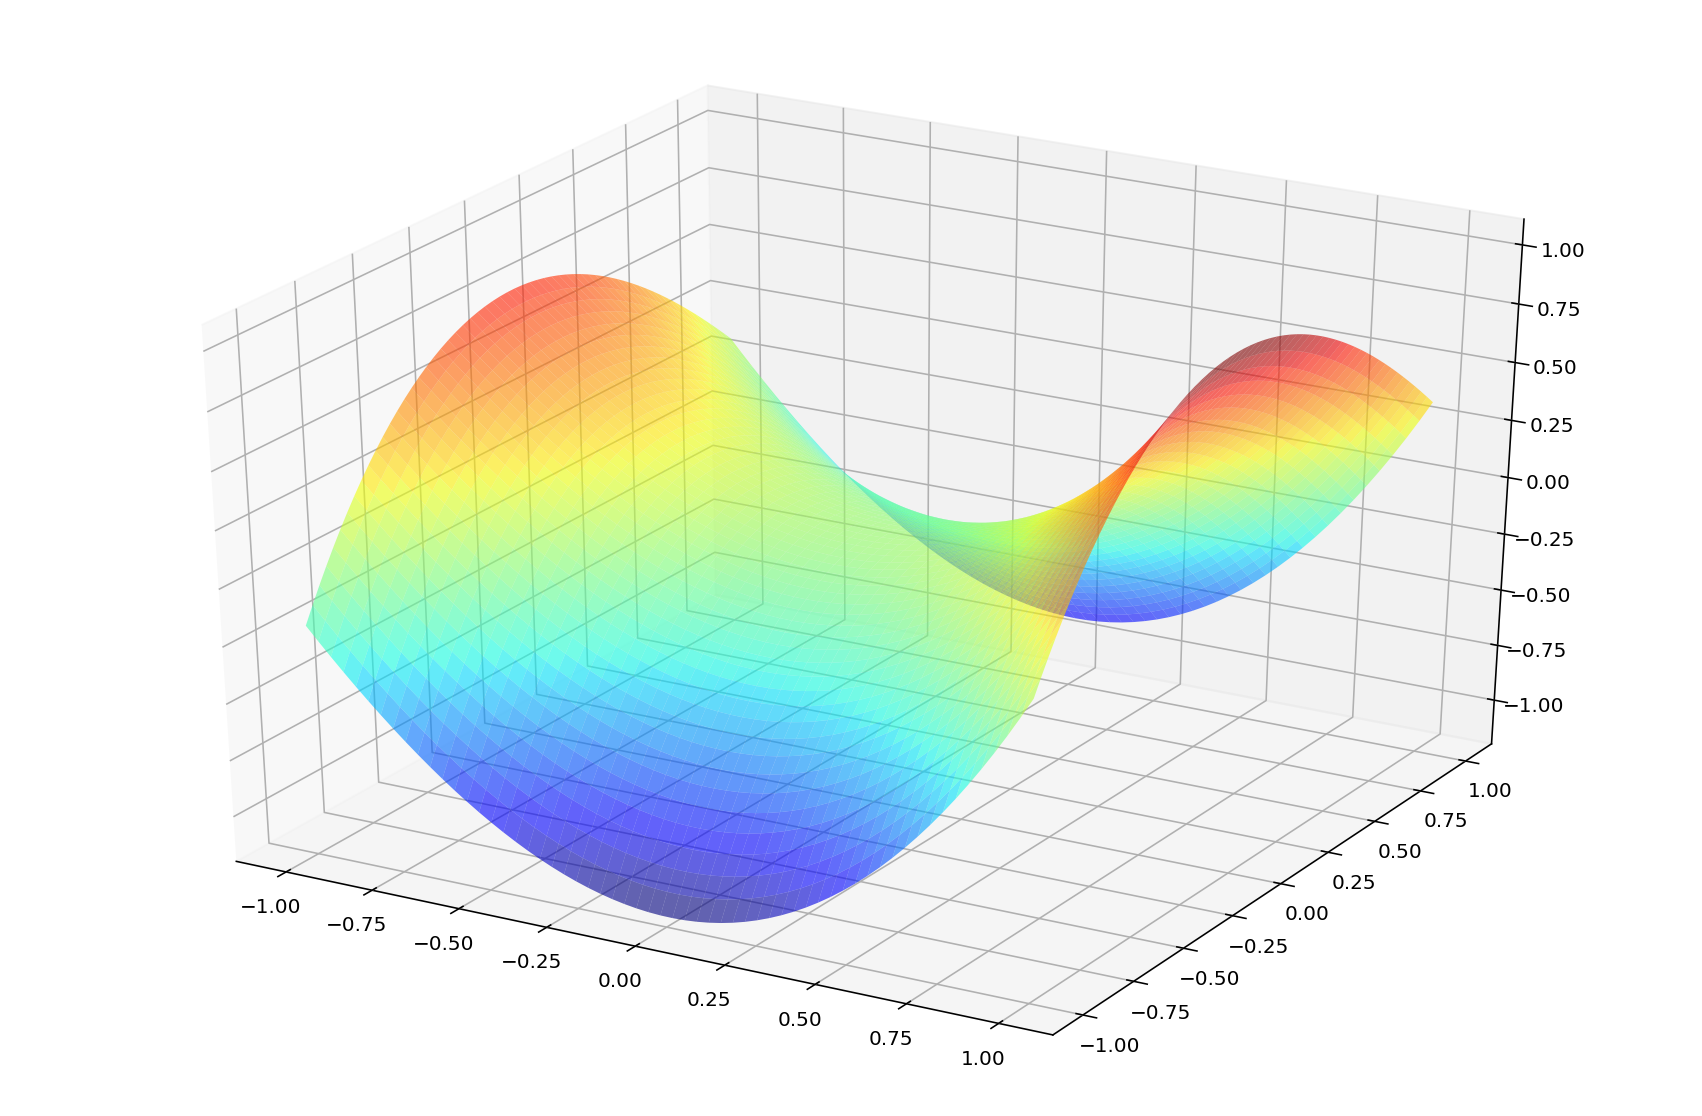

In [10]:
x_coordinate = np.linspace(-1, 1, 60) 
y_coordinate = np.linspace(-1, 1, 60) 

x_pred, y_pred = np.meshgrid(x_coordinate, y_coordinate, indexing='xy')
z_pred = f_pred(X, w)
Z = np.zeros((x_coordinate.size, y_coordinate.size))
idx = 0
for (i,j),v in np.ndenumerate(Z):
    Z[i, j] = z_pred[idx][0]
    idx = idx + 1
       
# plot
fig = plt.figure(figsize=(15,10))
pfAx = fig.add_subplot(1, 1, 1, projection='3d')
pfAx.plot_surface(x_pred, y_pred, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
pfAx.set_zlim(Z.min(),Z.max())

## 8. Plot the prediction function superimposed on the training data
<hr>

In [16]:
x_coordinate = np.linspace(-1, 1, 60) 
y_coordinate = np.linspace(-1, 1, 60) 

x_pred, y_pred = np.meshgrid(x_coordinate, y_coordinate, indexing='xy')
z_pred = f_pred(X, w)
Z = np.zeros((x_coordinate.size, y_coordinate.size))
idx = 0
for (i,j),v in np.ndenumerate(Z):
    Z[i, j] = z_pred[idx][0]
    idx = idx + 1
       
# plot
fig = plt.figure(figsize=(15,10))
pfAx = fig.add_subplot(1, 1, 1, projection='3d')
pfAx.plot_surface(x_pred, y_pred, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
pfAx.set_zlim(Z.min(),Z.max())
pfAx.scatter(x_pred, y_pred, z_train, c = 'r')

plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Output results

## 1. Plot the clean data in 3D cartesian coordinate system (1pt)

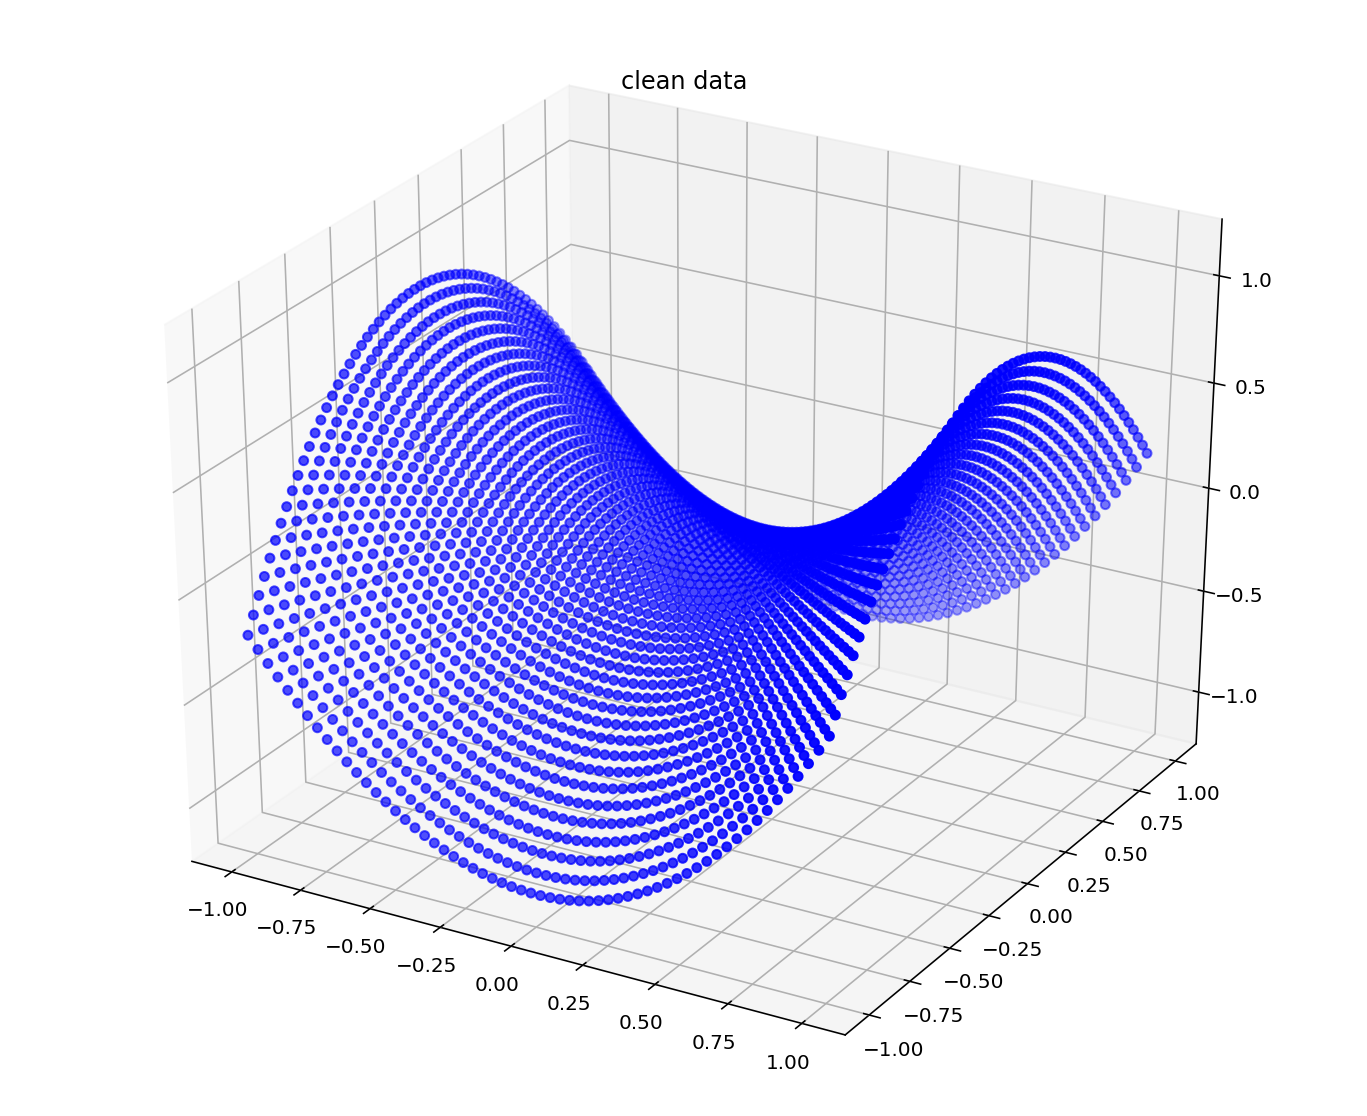

In [ ]:
cleanDataFig = plt.figure(figsize = (12, 10))
cleanDataAx = cleanDataFig.add_subplot(projection = '3d')
cleanDataAx.set_title(label = 'clean data')
cleanDataAx.scatter(x_clean, y_clean, z_clean, c = 'b')

plt.show()

## 2. Plot the noisy data in 3D cartesian coordinate system (1pt)

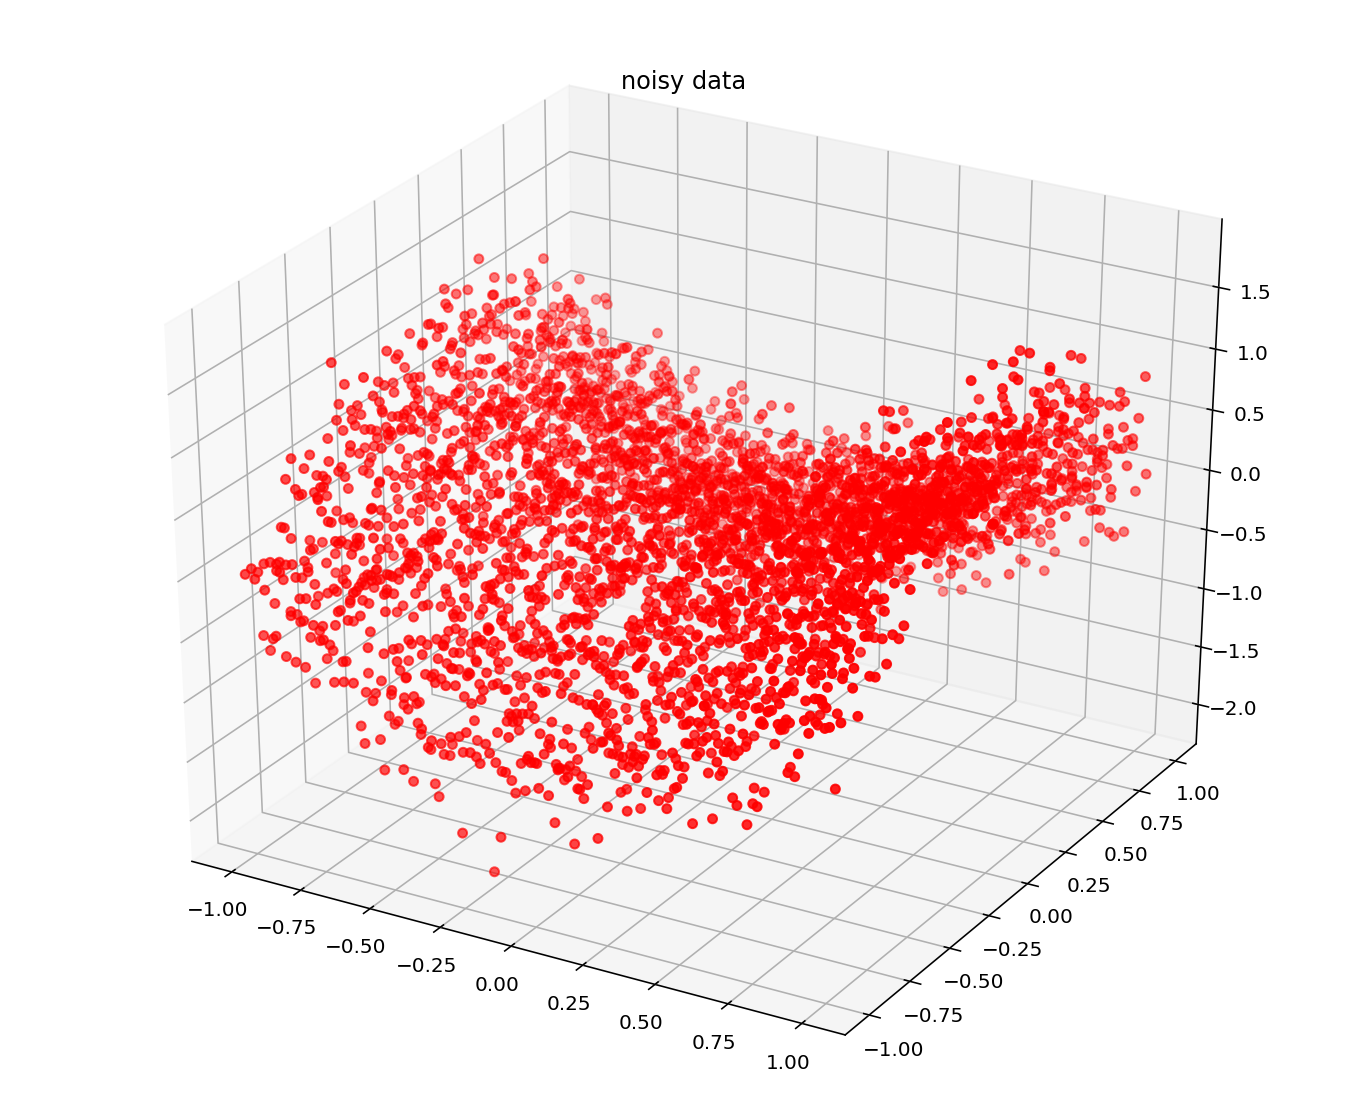

In [ ]:
trainDataFig = plt.figure(figsize = (12, 10))
trainDataAx = trainDataFig.add_subplot(projection = '3d')
trainDataAx.set_title(label = 'noisy data')
trainDataAx.scatter(x_train, y_train, z_train, c = 'r')

plt.show()

## 3. Plot the loss curve in the course of gradient descent (2pt)

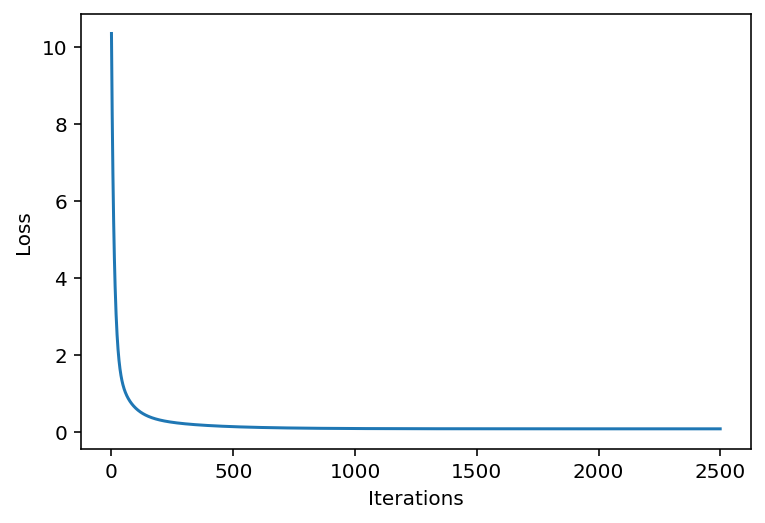

In [ ]:
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 4. Print out the final loss value at convergence of the gradient descent (1pt)

In [ ]:
print("loss at convergence = {}".format(L_iters[max_iter-1]))

loss at convergence = 0.08904299622332396


## 5. Print out the final model parameter values at convergence of the gradient descent (1pt)

In [ ]:
for i in range(w.size) :
    print("model parameter: w_{} = {}".format(i, w[i]))

model parameter: w_0 = [0.00940452]
model parameter: w_1 = [0.00940452]
model parameter: w_2 = [-0.02915459]
model parameter: w_3 = [-0.04968469]
model parameter: w_4 = [-0.00914727]
model parameter: w_5 = [0.90208055]
model parameter: w_6 = [-1.04096736]
model parameter: w_7 = [0.21386662]
model parameter: w_8 = [0.16927447]
model parameter: w_9 = [0.18288764]


## 6. Plot the prediction function in 3D cartesian coordinate system (2pt)

(-1.1553798538250017, 1.0618397033509592)

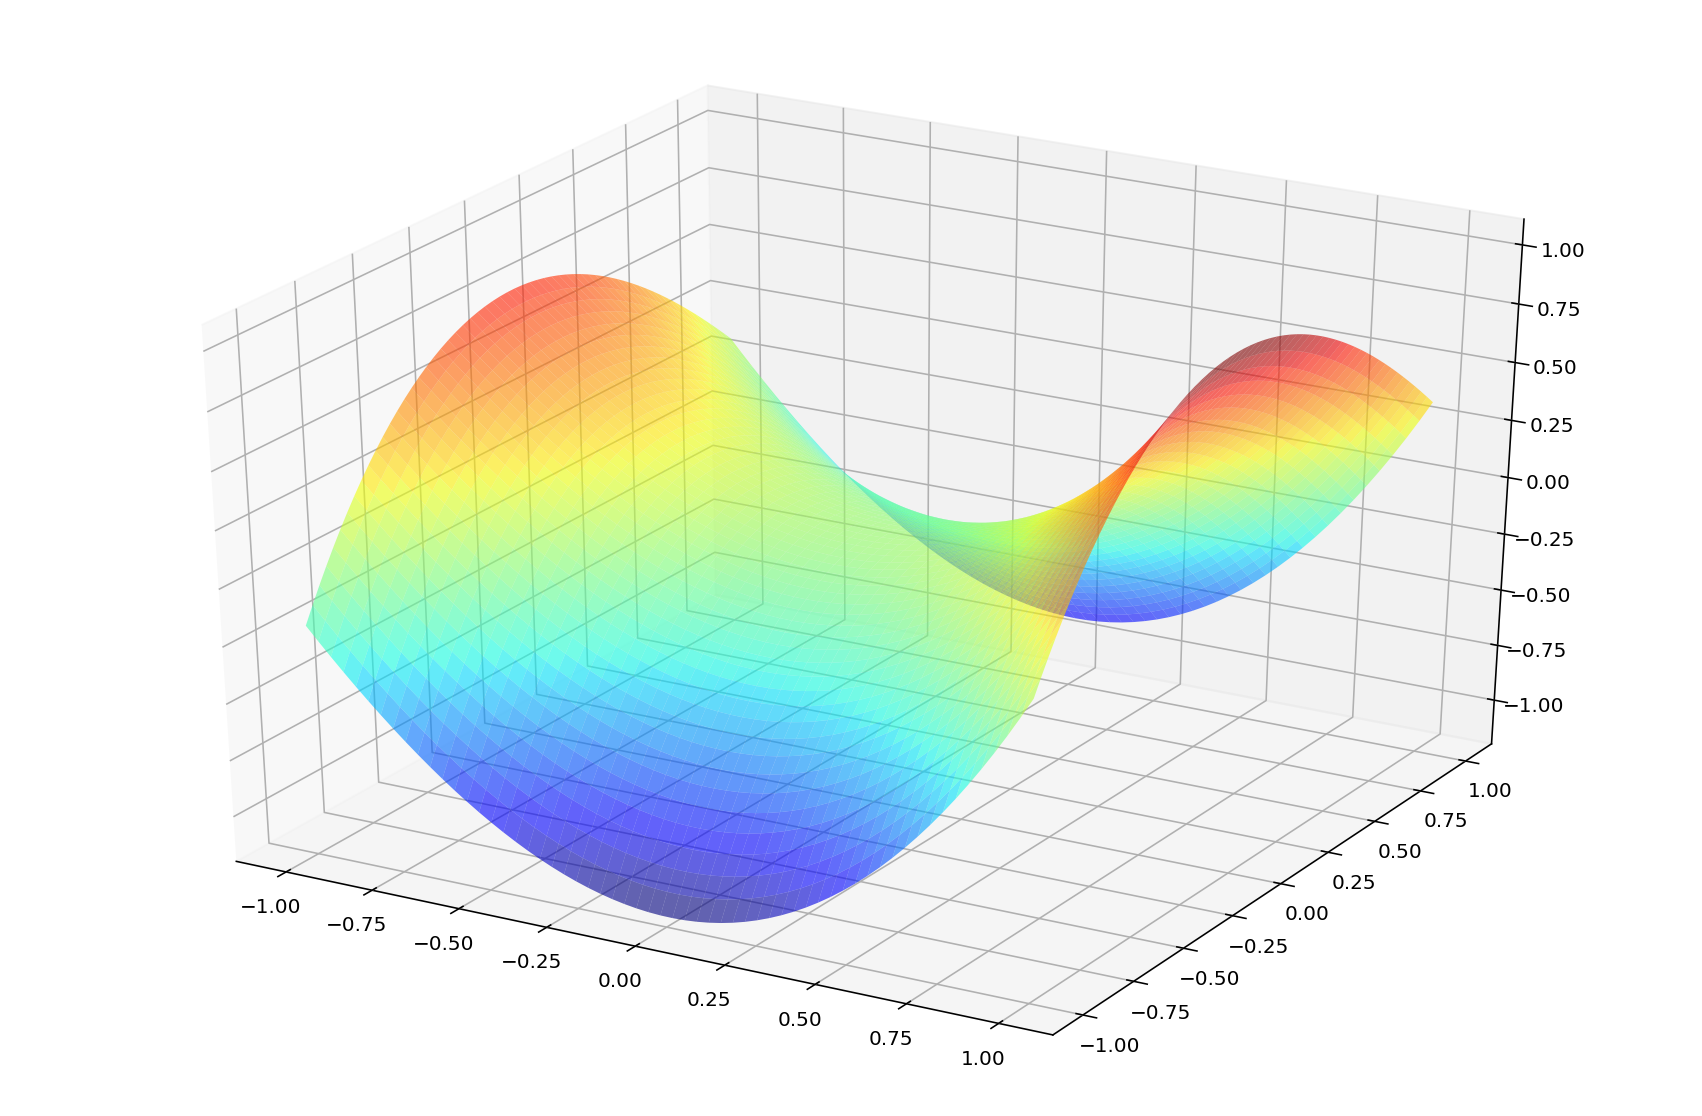

In [ ]:
fig = plt.figure(figsize=(15,10))
pfAx = fig.add_subplot(1, 1, 1, projection='3d')
pfAx.plot_surface(x_pred, y_pred, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
pfAx.set_zlim(Z.min(),Z.max())

## 7. Plot the prediction functions superimposed on the training data (2pt)

In [17]:
fig = plt.figure(figsize=(15,10))
pfAx = fig.add_subplot(1, 1, 1, projection='3d')
pfAx.plot_surface(x_pred, y_pred, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
pfAx.set_zlim(Z.min(),Z.max())
pfAx.scatter(x_pred, y_pred, z_train, c = 'r')

plt.show()

Output hidden; open in https://colab.research.google.com to view.